## *Predicting the Species (Setosa,Versicolor,Virginica) based on the length and width of the sepal and petal all in centimeter(cm)*


## ***Using Iris dataset***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Loading the datasets.
iris_dataset=sns.load_dataset('iris')
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_dataset.shape

(150, 5)

In [ ]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Checking the dataset , it has null value or not.
iris_dataset.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
# Statistical measures of the dataset.
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Counting the distribution of 'target' value.
iris_dataset['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
data_frame=pd.DataFrame(iris_dataset)
data_frame.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X=data_frame.drop(columns='species',axis=1)
Y=data_frame['species']

In [ ]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
print(Y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
# Accuracy score on training dataset.
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy Score on Training data : ",training_data_accuracy)

Accuracy Score on Training data :  0.975


In [ ]:
# Accuracy score on Testing dataset.
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("Accuracy score on testing dataset :",test_data_accuracy)

Accuracy score on testing dataset : 0.9666666666666667


## Generate a confusion matrix

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


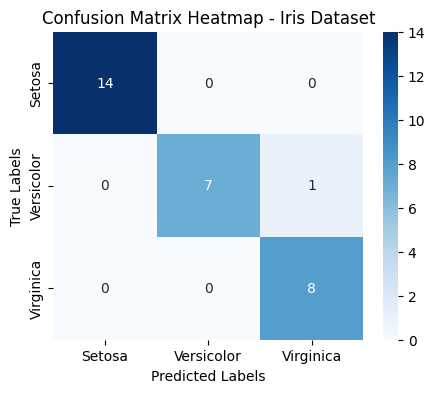

In [ ]:
# Create Heatmap of confusion matrix.
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,cbar=True,cmap='Blues',
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.title("Confusion Matrix Heatmap - Iris Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Building a predictive system.
input_data=(6.3,3.3,6,2.5)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

['virginica']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ***END***